<a href="https://colab.research.google.com/github/sarashree28/Facial-Recognition-model/blob/main/Facial_Recognition_with_Siamese_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install tensorflow opencv-python matplotlib

In [ ]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import shutil

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf


In [ ]:
POS_PATH = os.path.join('/content/gdrive/MyDrive/Colab Notebooks/data','positive')
NEG_PATH = os.path.join('/content/gdrive/MyDrive/Colab Notebooks/data','negative1')
ANC_PATH = os.path.join('/content/gdrive/MyDrive/Colab Notebooks/data','anchor')

In [ ]:
# os.makedirs(POS_PATH)
# os.makedirs(NEG_PATH)
# os.makedirs(ANC_PATH)
# os.makedirs(NEG_PATH)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !unzip gdrive/MyDrive/human.zip

In [ ]:
# try:
#     for directory in os.listdir('human faces'):
#         dir_path = os.path.join('human faces', directory)

#         # Check if dir_path is a directory
#         if os.path.isdir(dir_path):
#             for file in os.listdir(dir_path):
#                 EX_PATH = os.path.join(dir_path, file)
#                 NEW_PATH = os.path.join(NEG_PATH, file)

#                 # Copy the file to the new path
#                 shutil.copy(EX_PATH, NEW_PATH)
#                 print(f'Copied {EX_PATH} to {NEW_PATH}')
# except Exception as e:
#     print(f'Error: {e}')

In [ ]:
# cap = cv2.VideoCapture(5)
# while cap.isOpened():
#   ret,frame = cap.read()

#   cv2.imshow('Image Collection', frame)

#   if cv2.waitKey(1) & 0XFF == ord('q'):
#     break
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
!pip install ipywidgets
!apt-get install -y ffmpeg

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import PIL
from io import BytesIO
import uuid
import os
import ipywidgets as widgets


def capture_image():
    js = Javascript('''
    async function captureImage() {
        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;
        video.play();
        document.body.appendChild(video);
        await new Promise((resolve) => setTimeout(resolve, 1000));
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        const imgDataUrl = canvas.toDataURL('image/jpeg');
        stream.getTracks().forEach(track => track.stop());
        document.body.removeChild(video);
        return imgDataUrl;
    }
    captureImage();
    ''')
    display(js)
    data = eval_js('captureImage()')
    return data

def save_image(data_url, path):
    img_data = b64decode(data_url.split(',')[1])
    img = PIL.Image.open(BytesIO(img_data))
    img_np = np.array(img)
    img_cv = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
    img_cv = img_cv[150:150+250, 250:250+250, :]
    imgname = os.path.join(path, '{}.jpeg'.format(uuid.uuid1()))
    cv2.imwrite(imgname, img_cv)
    print(f"Image saved to {imgname}")
    cv2_imshow(img_cv)

def on_anc_button_click(b):
    img_data_url = capture_image()
    save_image(img_data_url, ANC_PATH)

def on_pos_button_click(b):
    img_data_url = capture_image()
    save_image(img_data_url, VER_PATH)

anc_button = widgets.Button(description="Capture ANC Image")
anc_button.on_click(on_anc_button_click)

pos_button = widgets.Button(description="Capture POS Image")
pos_button.on_click(on_pos_button_click)

display(anc_button)
display(pos_button)



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Button(description='Capture ANC Image', style=ButtonStyle())

Button(description='Capture POS Image', style=ButtonStyle())

In [ ]:
# img_data_url

In [ ]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpeg').take(200)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpeg').take(200)
negative1 = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(200)

In [ ]:
# import tensorflow as tf

# def decode_filename(byte_string):
#     return tf.strings.strip(byte_string)

In [ ]:
# negative = negative.map(lambda x: decode_filename(x))

In [ ]:
# import cv2
# import numpy as np

# def load_and_convert_image(image_path):
#     image_path = image_path.numpy().decode('utf-8')
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     if image is None:
#         raise ValueError(f"Image at {image_path} could not be read")
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
#     return image_rgb


In [ ]:
# # Map the load_and_convert_image function to the dataset
# negative_rgb = negative.map(lambda x: tf.py_function(load_and_convert_image, [x], tf.uint8))


In [ ]:
# negative_rgb

In [ ]:
# import matplotlib.pyplot as plt

# # Create an iterator
# iterator = iter(negative_rgb)

# # Fetch and display the first image
# for _ in range(1):
#     image = next(iterator)
#     plt.imshow(image.numpy())
#     plt.axis('off')
#     plt.show()


In [ ]:
negative1

<_TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [ ]:
# negative = negative.map()

In [ ]:
# negative = np.repeat(negative, 3, axis=-1)

In [ ]:
# negative2 = negative.as_numpy_iterator()

In [ ]:
# ex1= negative2.next()
# ex1

In [ ]:
# import tensorflow as tf
# import numpy as np

# # Path to your grayscale images
# # GRAYSCALE_PATH = "/path/to/your/grayscale/images"

# # # Step 1: List grayscale image files
# # grayscale_files = tf.data.Dataset.list_files(GRAYSCALE_PATH + '/*.jpg').take(200)

# # Step 2: Function to load and preprocess grayscale images
# def load_grayscale_image(file_path):
#     image = tf.io.read_file(file_path)
#     image = tf.image.decode_jpeg(image, channels=1)  # Load as grayscale
#     image = tf.image.resize(image, [224, 224])
#     image = image / 255.0  # Normalize to [0, 1]
#     return image

# # Step 3: Map function to dataset
# grayscale_dataset = negative.map(load_grayscale_image)

# # Step 4: Convert grayscale images to RGB
# def grayscale_to_rgb(image):
#     return tf.image.grayscale_to_rgb(image)

# negative_dataset = grayscale_dataset.map(grayscale_to_rgb)

# # Step 5: Batch and prefetch for performance
# batch_size = 32
# negative_dataset = negative_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# # Example: Iterate over the dataset
# for batch in negative_dataset.take(1):
#     print(batch.shape)  # Should output: (batch_size, 224, 224, 3)


In [ ]:
# import tensorflow as tf
# import numpy as np
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import img_to_array

# # Assume NEG_PATH contains image files
# # NEG_PATH = "/path/to/your/images"

# # # Step 1: List files
# # negative = tf.data.Dataset.list_files(NEG_PATH + '/*.jpg').take(200)

# # Step 2: Function to load and preprocess images
# def load_and_preprocess_image(file_path):
#     image = tf.io.read_file(file_path)
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.resize(image, [224, 224])
#     image = image / 255.0  # Normalize to [0, 1]
#     return image

# # Step 3: Map function to dataset
# positive_images = positive.map(load_and_preprocess_image)

# # Step 4: Convert to numpy array (optional)
# positive_array = np.array([img.numpy() for img in positive_images])

# # Step 5: Convert numpy array to TensorFlow Dataset
# positive_dataset = tf.data.Dataset.from_tensor_slices(positive_array)

# # Step 6: Batch and prefetch for performance
# batch_size = 32
# positivetive_dataset = positive_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# # Example: Iterate over the dataset
# for batch in positive_dataset.take(1):
#     print(batch.shape)
#      # Print the shape of each batch


In [ ]:
dir_test = anchor.as_numpy_iterator()

In [ ]:
dir_test.next()

b'/content/gdrive/MyDrive/Colab Notebooks/data/anchor/510941ec-4505-11ef-a962-0242ac1c000c.jpeg'

In [ ]:
def preprocess(file_path):
  byte_img = tf.io.read_file(file_path)
  img1 = tf.io.decode_jpeg(byte_img)
  img1 = tf.image.resize(img1,(100,100))
  img1 = img1/255.0
  return img1


In [ ]:
# ex1 = preprocess(ex1)

In [ ]:
# def decode_filename(byte_string):
#     return tf.py_function(lambda x: x.decode('utf-8'), [byte_string], tf.string)



In [ ]:
# negative = negative.map(decode_filename)

In [ ]:
# def load_and_convert_image(image_path):
#     # Load the grayscale image
#     gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#     # Check if image is loaded successfully
#     if gray_image is None:
#         raise ValueError("Image not found or unable to load")

#     # Convert grayscale image to RGB
#     rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

#     return rgb_image

In [ ]:
# negga1 = negative.as_numpy_iterator()
# negga1.next()

In [ ]:
# negative_rgb = negative.map(load_and_convert_image)

In [ ]:
# rgb_image

In [ ]:
# rgb_image = load_and_convert_image(ex1)


In [ ]:
# plt.imshow(ex1)

In [ ]:
img1 = preprocess(b'/content/gdrive/MyDrive/Colab Notebooks/data/anchor/c8a507d4-4507-11ef-a962-0242ac1c000c.jpeg')

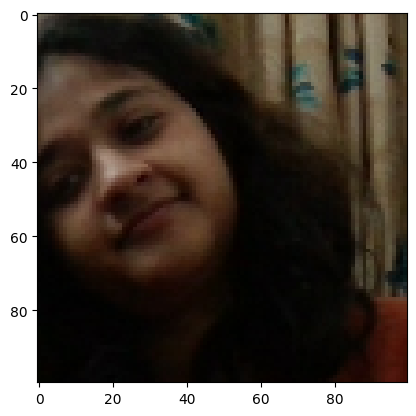

In [ ]:
plt.imshow(img1)

In [ ]:
img1.numpy().max()

0.7056373

In [ ]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0
# tf.ones_like([1,1,1,4,5676,2345.8])

In [ ]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative1 , tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [ ]:
# for batch in negative_dataset.take(1):
#     print(batch.shape)

In [ ]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [ ]:
tf.ones(len(anchor))

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
tf.zeros(len(anchor))

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
samples = data.as_numpy_iterator()

In [ ]:
example = samples.next()

In [ ]:
def preprocess_twin(input_img, validation_img,label):
  return(preprocess(input_img), preprocess(validation_img),label)

In [ ]:
res = preprocess_twin(*example)

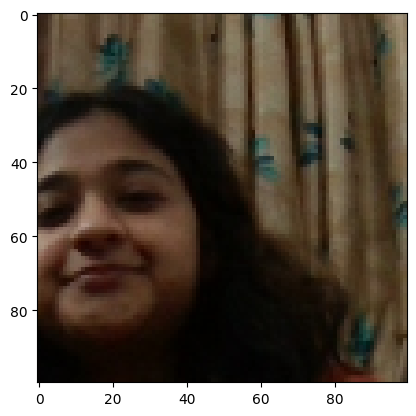

In [ ]:
plt.imshow(res[0])

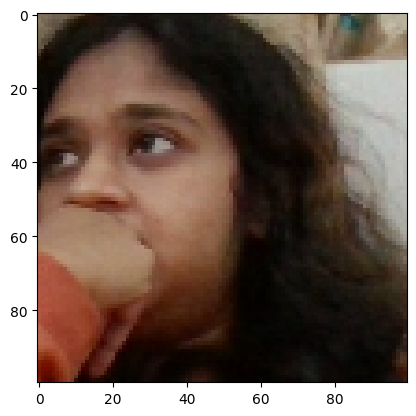

In [ ]:
plt.imshow(res[1])

In [ ]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [ ]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [ ]:
samples = data.as_numpy_iterator().next()

In [ ]:
# len(samples)

In [ ]:
# len(samples[0])


In [ ]:
# plt.imshow(samples[1])

In [ ]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [ ]:
# training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(20)
train_data = train_data.prefetch(10)

In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [ ]:
round(len(data)*.7)

280

In [ ]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(20)
test_data = test_data.prefetch(10)

In [ ]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [ ]:
round(len(data)*.3)

120

In [ ]:
def make_embedding():
  inp = Input(shape=(100,100,3), name='input_image')

  c1 = Conv2D(64, (10,10),activation = 'relu')(inp)
  m1 = MaxPooling2D(64,(2,2), padding='same')(c1)

  c2 = Conv2D(128, (7,7), activation='relu')(m1)
  m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

  c3 = Conv2D(128, (4,4), activation='relu')(m2)
  m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

  c4 = Conv2D(256, (4,4), activation='relu')(m3)
  f1 = Flatten()(c4)
  d1 = Dense(4096, activation='sigmoid')(f1)

  return Model(inputs=[inp] ,outputs=[d1] ,name='embedding')



In [ ]:
embedding = make_embedding()

In [ ]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [ ]:
class L1Dist(Layer):
  def __init__(self,**kwargs):
    super().__init__()

  def call(self, input_embedding, validation_embedding):
    return tf.math.abs(input_embedding - validation_embedding)

In [ ]:
l1 = L1Dist()

In [ ]:
def make_siamese_model():

  input_image = Input(name='input_img', shape=(100,100,3))

  validation_image = Input(name='validation_img', shape=(100,100,3))

  siamese_layer = L1Dist()
  siamese_layer._name = 'distance'
  distances = siamese_layer(embedding(input_image), embedding(validation_image))

  classifier = Dense(1, activation='sigmoid')(distances)

  return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')


In [ ]:
siamese_model = make_siamese_model()

In [ ]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [ ]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [ ]:
opt = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = '/content/gdrive/MyDrive/Colab Notebooks/training_checkpoints'
check = os.path.join(checkpoint_dir,'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)


In [ ]:
# os.makedirs(check)

In [ ]:
@tf.function
def train_step(batch):
  with tf.GradientTape() as tape:
    X = batch[:2]

    y = batch[2]

    yhat = siamese_model(X, training=True)

    loss = binary_cross_loss(y, yhat)
  print(loss)
  grad = tape.gradient(loss, siamese_model.trainable_variables)

  opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
  return loss

In [ ]:
def train(data, EPOCHS):
  for epoch in range(1, EPOCHS+1):
    print('\n Epoch {}/{}'.format(epoch, EPOCHS))
    progbar = tf.keras.utils.Progbar(len(train_data))

    for idx, batch in enumerate(train_data):
      train_step(batch)
      progbar.update(idx)

    if epoch % 10 == 0:
      checkpoint.save(file_prefix=check)

In [ ]:
EPOCHS = 10

In [ ]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
13/14 [==========================>...] - ETA: 48s 
 Epoch 2/50
13/14 [==========================>...] - ETA: 48s 
 Epoch 3/50
13/14 [==========================>...] - ETA: 48s 
 Epoch 4/50
13/14 [==========================>...] - ETA: 48s 
 Epoch 5/50
13/14 [==========================>...] - ETA: 47s 
 Epoch 6/50
13/14 [==========================>...] - ETA: 47s 
 Epoch 7/50
13/14 [==========================>...] - ETA: 47s 
 Epoch 8/50
13/14 [==========================>...] - ETA: 47s 
 Epoch 9/50
13/14 [==========================>...] - ETA: 47s 
 Epoch 10/50
13/14 [==========================>...] - ETA: 47s 
 Epoch 11/50
13/14 [==========================>...] - ETA: 47s 
 Epoch 12/50
13/14 [==========================>...] - ETA: 50s 
 Epoch 13/50
13/14 [==========================>...] - ETA: 51s 
 Epoch 14/50
13/14 [==

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
test_var = test_data.as_numpy_iterator().next()

In [ ]:
test_var[0]

array([[[[0.4252451 , 0.35857844, 0.31936276],
         [0.34411764, 0.27156863, 0.23529412],
         [0.27254903, 0.19411765, 0.16078432],
         ...,
         [0.02769608, 0.03553922, 0.02377451],
         [0.0245098 , 0.03235294, 0.01470588],
         [0.03529412, 0.04705882, 0.01960784]],

        [[0.4120098 , 0.34632352, 0.30416667],
         [0.34901962, 0.2764706 , 0.23627451],
         [0.27181372, 0.19338235, 0.15759803],
         ...,
         [0.04240196, 0.04044118, 0.03553922],
         [0.03848039, 0.04436275, 0.03357843],
         [0.03210784, 0.03970588, 0.01862745]],

        [[0.41985294, 0.35710785, 0.3002451 ],
         [0.35392156, 0.28137255, 0.23088235],
         [0.27892157, 0.20490196, 0.16102941],
         ...,
         [0.05490196, 0.04117647, 0.04068628],
         [0.04019608, 0.03308824, 0.03480392],
         [0.03235294, 0.03259804, 0.02401961]],

        ...,

        [[0.45514706, 0.2247549 , 0.14583333],
         [0.33308825, 0.12916666, 0.06740196]

In [ ]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [ ]:
test_input

array([[[[8.11274499e-02, 6.54411763e-02, 6.49509802e-02],
         [9.60784331e-02, 7.94117674e-02, 6.91176504e-02],
         [1.51960790e-01, 1.23529412e-01, 1.11764707e-01],
         ...,
         [4.93382365e-01, 4.48284328e-01, 3.78186285e-01],
         [4.49999988e-01, 3.99754912e-01, 3.23039204e-01],
         [3.71568620e-01, 3.25980395e-01, 2.35539213e-01]],

        [[1.04411766e-01, 8.67647082e-02, 8.38235319e-02],
         [1.50000006e-01, 1.24754898e-01, 1.13970585e-01],
         [2.27696076e-01, 1.89460784e-01, 1.78676471e-01],
         ...,
         [5.06127477e-01, 4.63725477e-01, 3.96568626e-01],
         [4.10294116e-01, 3.72549027e-01, 3.00245106e-01],
         [2.85539210e-01, 2.57843137e-01, 1.73774511e-01]],

        [[1.67647064e-01, 1.38970584e-01, 1.30882353e-01],
         [2.24509805e-01, 1.86274514e-01, 1.75490201e-01],
         [3.11764717e-01, 2.64705896e-01, 2.44362742e-01],
         ...,
         [4.90441173e-01, 4.65931386e-01, 3.82598042e-01],
         [

In [ ]:
print("Shape of test_input:", test_input.shape)
print("Type of test_input:", type(test_input))
print("Shape of test_val:", test_val.shape)
print("Type of test_val:", type(test_val))

Shape of test_input: (20, 100, 100, 3)
Type of test_input: <class 'numpy.ndarray'>
Shape of test_val: (20, 100, 100, 3)
Type of test_val: <class 'numpy.ndarray'>


In [ ]:

# Convert test_val from grayscale to RGB
# test_val_rgb = np.repeat(test_val, 3, axis=-1)

# # Check new shapes
# print("Shape of test_input:", test_input.shape)
# print("Shape of test_val_rgb:", test_val_rgb.shape)

# Run the prediction
y_hat = siamese_model.predict([test_input, test_val])
y_hat
# y_hat = siamese_model.predict([test_input[np.newaxis, ...], test_val[np.newaxis, ...]])
# y_hat


1/1 [==============================] - 0s 352ms/step


array([[9.7038424e-01],
       [2.4430314e-04],
       [2.5209560e-04],
       [9.9996912e-01],
       [1.6228173e-02],
       [7.8473561e-02],
       [9.9999797e-01],
       [1.0711887e-03],
       [2.0691531e-04],
       [9.3983236e-04],
       [9.9989188e-01],
       [9.9519205e-01],
       [2.1989614e-02],
       [1.1011988e-03],
       [9.9967253e-01],
       [1.6385905e-04],
       [7.3443907e-01],
       [9.8532382e-03],
       [3.4874797e-02],
       [9.9999988e-01]], dtype=float32)

In [ ]:
[1 if prediction > 0.5 else 0 for prediction in y_hat]

[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1]

In [ ]:
y_true

array([1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1.], dtype=float32)

In [ ]:
m = Recall()
m.update_state(y_true, y_hat)
m.result().numpy()

1.0

In [ ]:
m = Precision()
m.update_state(y_true, y_hat)
m.result().numpy()

1.0

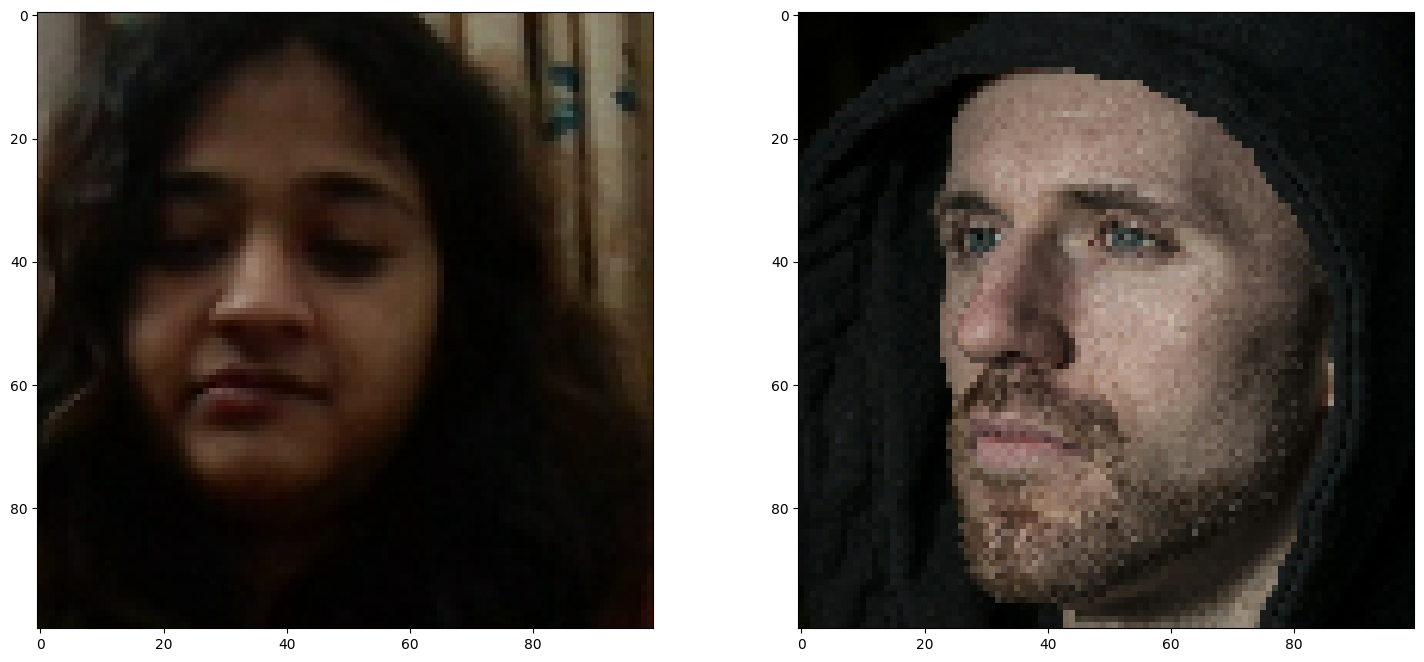

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.imshow(test_input[4])

plt.subplot(1,2,2)
plt.imshow(test_val[4])

plt.show()

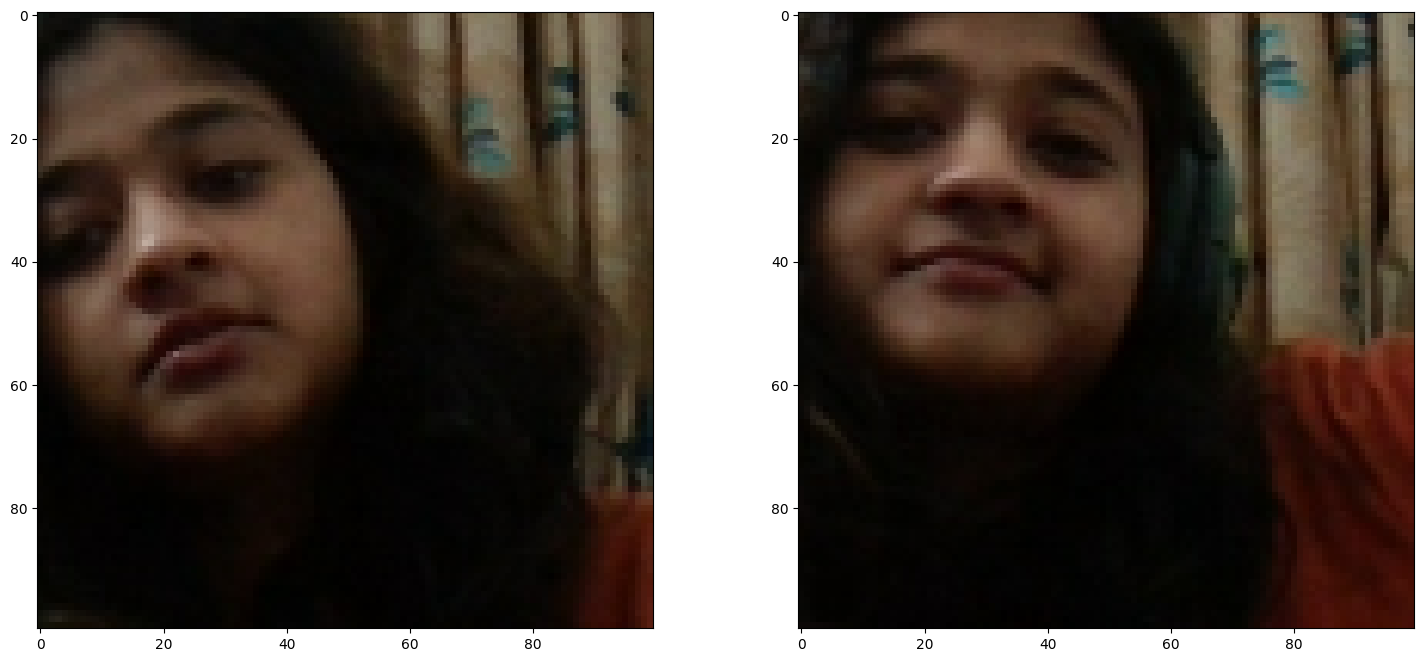

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.imshow(test_input[10])

plt.subplot(1,2,2)
plt.imshow(test_val[10])

plt.show()

In [ ]:
siamese_model.save('siamesemodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('siamesemodel.h5', custom_objects={'L1Dist':L1Dist , 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [ ]:
model.predict([test_input, test_val])

1/1 [==============================] - 0s 109ms/step


array([[9.7038424e-01],
       [2.4430314e-04],
       [2.5209560e-04],
       [9.9996912e-01],
       [1.6228173e-02],
       [7.8473561e-02],
       [9.9999797e-01],
       [1.0711887e-03],
       [2.0691531e-04],
       [9.3983236e-04],
       [9.9989188e-01],
       [9.9519205e-01],
       [2.1989614e-02],
       [1.1011988e-03],
       [9.9967253e-01],
       [1.6385905e-04],
       [7.3443907e-01],
       [9.8532382e-03],
       [3.4874797e-02],
       [9.9999988e-01]], dtype=float32)

In [ ]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

Real Time Test


In [ ]:
VER_PATH = os.path.join('/content/gdrive/MyDrive/Colab Notebooks/data','verification_images')
INPUT_PATH = os.path.join('/content/gdrive/MyDrive/Colab Notebooks/data','input_images')

In [ ]:
# def verify(model, detection_threshold, verification_threshold):
#   results =[]
#   for image in os.path.join('verification_images'):
#     input_img = preprocess(os.path.join('input_images','input_image.jpeg'))
#     validation_img = preprocess(os.path.join('verification_images',image))
#     result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
#     results.append(result)

#   detection = np.sum(np.array(results) > detection_threshold)
#   verification = detection / len(os.path.join('verification_images'))
#   verified = verification > verification_threshold

#   return results, verified
# results, verified = verify(model, 0.5, 0.5)
# print(verified)